In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

In [ ]:
from sklearn import linear_model

# Importing data

## Importing test data

In [ ]:
GARCH_ged_test_preds_and_actuals=pd.read_feather('/content/GARCH_with_ged_walk_forward_test_preds_and_actuals.feather')
GARCH_t_test_preds_and_actuals=pd.read_feather('/content/GARCH_with_t_walk_forward_test_preds_and_actuals.feather')
GARCH_skewt_test_preds_and_actuals=pd.read_feather('/content/GARCH_with_skewt_walk_forward_test_preds_and_actuals.feather')
GARCH_norm_test_preds_and_actuals=pd.read_feather('/content/GARCH_with_norm_walk_forward_test_preds_and_actuals.feather')
GARCH_all_dist_test_preds_and_actuals=pd.read_feather('/content/GARCH_with_all_dist_walk_forward_test_preds_and_actuals.feather')

In [ ]:
EGARCH_ged_test_preds_and_actuals=pd.read_feather('/content/EGARCH_with_ged_walk_forward_test_preds_and_actuals.feather')
EGARCH_t_test_preds_and_actuals=pd.read_feather('/content/EGARCH_with_t_walk_forward_test_preds_and_actuals.feather')
EGARCH_skewt_test_preds_and_actuals=pd.read_feather('/content/EGARCH_with_skewt_walk_forward_test_preds_and_actuals.feather')
EGARCH_norm_test_preds_and_actuals=pd.read_feather('/content/EGARCH_with_norm_walk_forward_test_preds_and_actuals.feather')
EGARCH_all_dist_test_preds_and_actuals=pd.read_feather('/content/EGARCH_with_all_dist_walk_forward_test_preds_and_actuals.feather')

## Importing train data

In [ ]:
GARCH_ged_train_preds_and_actuals=pd.read_feather('/content/GARCH_with_ged_walk_forward_train_preds_and_actuals.feather')
GARCH_t_train_preds_and_actuals=pd.read_feather('/content/GARCH_with_t_walk_forward_train_preds_and_actuals.feather')
GARCH_skewt_train_preds_and_actuals=pd.read_feather('/content/GARCH_with_skewt_walk_forward_train_preds_and_actuals.feather')
GARCH_norm_train_preds_and_actuals=pd.read_feather('/content/GARCH_with_norm_walk_forward_train_preds_and_actuals.feather')
GARCH_all_dist_train_preds_and_actuals=pd.read_feather('/content/GARCH_with_all_dist_walk_forward_train_preds_and_actuals.feather')

In [ ]:
EGARCH_ged_train_preds_and_actuals=pd.read_feather('/content/EGARCH_with_ged_walk_forward_train_preds_and_actuals.feather')
EGARCH_t_train_preds_and_actuals=pd.read_feather('/content/EGARCH_with_t_walk_forward_train_preds_and_actuals.feather')
EGARCH_skewt_train_preds_and_actuals=pd.read_feather('/content/EGARCH_with_skewt_walk_forward_train_preds_and_actuals.feather')
EGARCH_norm_train_preds_and_actuals=pd.read_feather('/content/EGARCH_with_norm_walk_forward_train_preds_and_actuals.feather')
EGARCH_all_dist_train_preds_and_actuals=pd.read_feather('/content/EGARCH_with_all_dist_walk_forward_train_preds_and_actuals.feather')

In [ ]:
GARCH_ged_test_preds_and_actuals.head()

,test preds,test trues
0,0.126535,0.095351
1,0.126678,0.085227
2,0.125235,0.089285
3,0.126383,0.080365
4,0.122352,0.025312


# Avg

In [ ]:
def get_avg_preds(all_dist_preds:list):


  all_dist_preds_np_array=np.array([])

  # row wise append
  for model_preds in all_dist_preds:

    if all_dist_preds_np_array.size==0:
      all_dist_preds_np_array=np.array(model_preds)
      all_dist_preds_np_array=np.expand_dims(all_dist_preds_np_array,axis=0)

    else:
      all_dist_preds_np_array=np.append(all_dist_preds_np_array, np.array(model_preds).reshape(1,-1),axis=0)

  avg_preds=np.mean(all_dist_preds_np_array,axis=0)

  return avg_preds

# Get split wise preds

In [ ]:
def get_split_wise_preds(agg_preds:np.array, test_size:int):
  split_wise_preds=[]
  for i in range(0,agg_preds.shape[0],test_size):
    split_wise_preds.append(agg_preds[i:(i+test_size)])

  return split_wise_preds

## calulate average of preds

In [ ]:
avg_preds=get_avg_preds([GARCH_ged_test_preds_and_actuals['test preds'],
                         GARCH_t_test_preds_and_actuals['test preds'],
                         GARCH_skewt_test_preds_and_actuals['test preds'],
                         GARCH_norm_test_preds_and_actuals['test preds'],
                         GARCH_all_dist_test_preds_and_actuals['test preds'],
                         EGARCH_ged_test_preds_and_actuals['test preds'],
                         EGARCH_t_test_preds_and_actuals['test preds'],
                         EGARCH_skewt_test_preds_and_actuals['test preds'],
                         EGARCH_norm_test_preds_and_actuals['test preds'],
                         EGARCH_all_dist_test_preds_and_actuals['test preds']])

In [ ]:
avg_preds.shape

(3900,)

In [ ]:
split_wise_avg_preds=get_split_wise_preds(avg_preds,1300)

In [ ]:
GARCH_ged_test_preds_and_actuals['test preds'].shape, avg_preds.shape

((3900,), (3900,))

## Calculate MSEs

In [ ]:
GARCH_ged_mse=mean_squared_error( GARCH_ged_test_preds_and_actuals['test trues'],GARCH_ged_test_preds_and_actuals['test preds'])
GARCH_t_mse=mean_squared_error( GARCH_t_test_preds_and_actuals['test trues'],GARCH_t_test_preds_and_actuals['test preds'])
GARCH_skewt_mse=mean_squared_error( GARCH_skewt_test_preds_and_actuals['test trues'],GARCH_skewt_test_preds_and_actuals['test preds'])
GARCH_norm_mse=mean_squared_error( GARCH_norm_test_preds_and_actuals['test trues'],GARCH_norm_test_preds_and_actuals['test preds'])

EGARCH_ged_mse=mean_squared_error( EGARCH_ged_test_preds_and_actuals['test trues'],EGARCH_ged_test_preds_and_actuals['test preds'])
EGARCH_t_mse=mean_squared_error( EGARCH_t_test_preds_and_actuals['test trues'],EGARCH_t_test_preds_and_actuals['test preds'])
EGARCH_skewt_mse=mean_squared_error( EGARCH_skewt_test_preds_and_actuals['test trues'],EGARCH_skewt_test_preds_and_actuals['test preds'])
EGARCH_norm_mse=mean_squared_error( EGARCH_norm_test_preds_and_actuals['test trues'],EGARCH_norm_test_preds_and_actuals['test preds'])

avg_preds_mse=mean_squared_error( GARCH_ged_test_preds_and_actuals['test trues'],avg_preds)

### Plotting MSEs

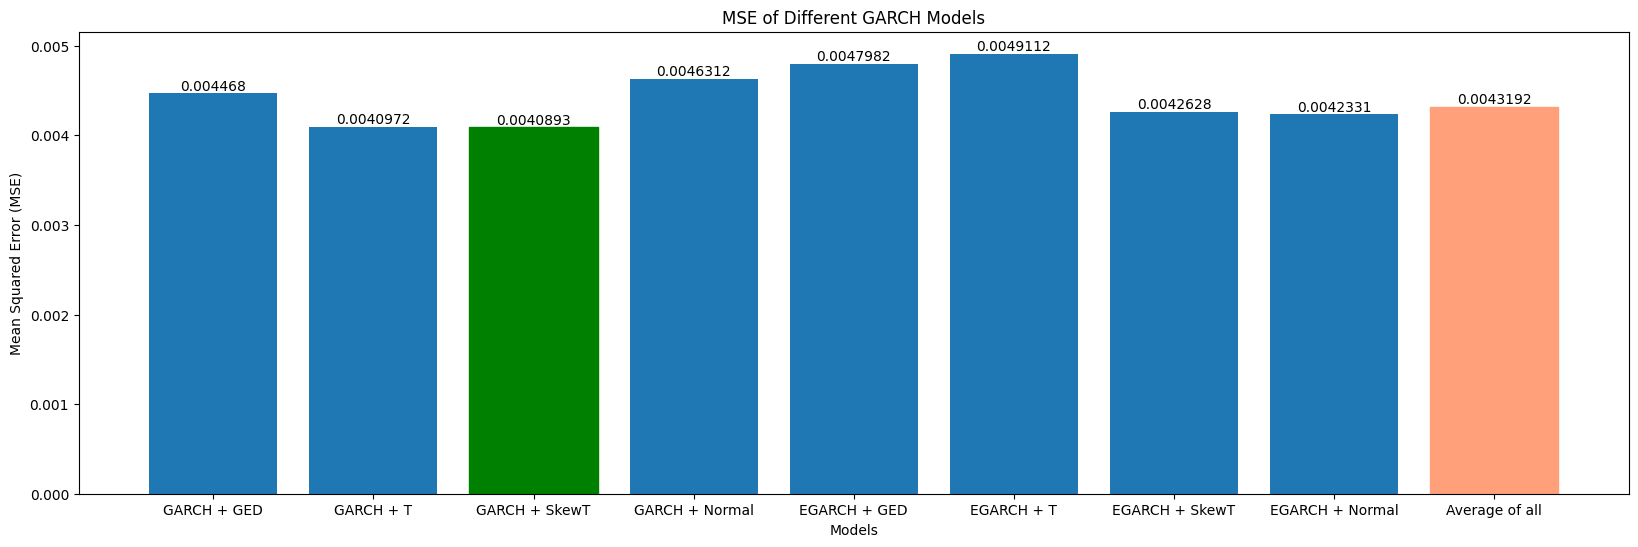

In [ ]:

mse_values = {
    'GARCH + GED': GARCH_ged_mse,
    'GARCH + T': GARCH_t_mse,
    'GARCH + SkewT': GARCH_skewt_mse,
    'GARCH + Normal': GARCH_norm_mse,
    'EGARCH + GED': EGARCH_ged_mse,
    'EGARCH + T': EGARCH_t_mse,
    'EGARCH + SkewT': EGARCH_skewt_mse,
    'EGARCH + Normal': EGARCH_norm_mse,
    'Average of all': avg_preds_mse
}

models = list(mse_values.keys())
mse = list(mse_values.values())

plt.figure(figsize=(20, 6))
bars = plt.bar(models, mse)

all_height = []
for bar in bars:
    all_height.append(bar.get_height())

min_height = min(all_height)
min_height_index = all_height.index(min_height)
bars[min_height_index].set_color('green')

bars[-1].set_color('lightsalmon')

for bar, value in zip(bars, mse):
    bar_height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, bar_height, round(value, 7), ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE of Different GARCH Models')
plt.show()


# Median

In [ ]:
def get_median_preds(all_dist_preds:list):
  all_dist_preds_np_array=np.array([])

  for model_preds in all_dist_preds:

    if all_dist_preds_np_array.size==0:
      all_dist_preds_np_array=np.array(model_preds)
      all_dist_preds_np_array=np.expand_dims(all_dist_preds_np_array,axis=0)

    else:
      all_dist_preds_np_array=np.append(all_dist_preds_np_array, np.array(model_preds).reshape(1,-1),axis=0)

  median_preds=np.median(all_dist_preds_np_array,axis=0)

  return median_preds


## Calculate median prediction

In [ ]:
median_preds=get_median_preds([GARCH_ged_test_preds_and_actuals['test preds'],
                         GARCH_t_test_preds_and_actuals['test preds'],
                         GARCH_skewt_test_preds_and_actuals['test preds'],
                         GARCH_norm_test_preds_and_actuals['test preds'],
                         GARCH_all_dist_test_preds_and_actuals['test preds'],
                         EGARCH_ged_test_preds_and_actuals['test preds'],
                         EGARCH_t_test_preds_and_actuals['test preds'],
                         EGARCH_skewt_test_preds_and_actuals['test preds'],
                         EGARCH_norm_test_preds_and_actuals['test preds'],
                         EGARCH_all_dist_test_preds_and_actuals['test preds']])

In [ ]:
split_wise_median_preds=get_split_wise_preds(median_preds,1300)

## Calculate MSEs

In [ ]:
median_preds_mse=mean_squared_error( GARCH_ged_test_preds_and_actuals['test trues'],median_preds)

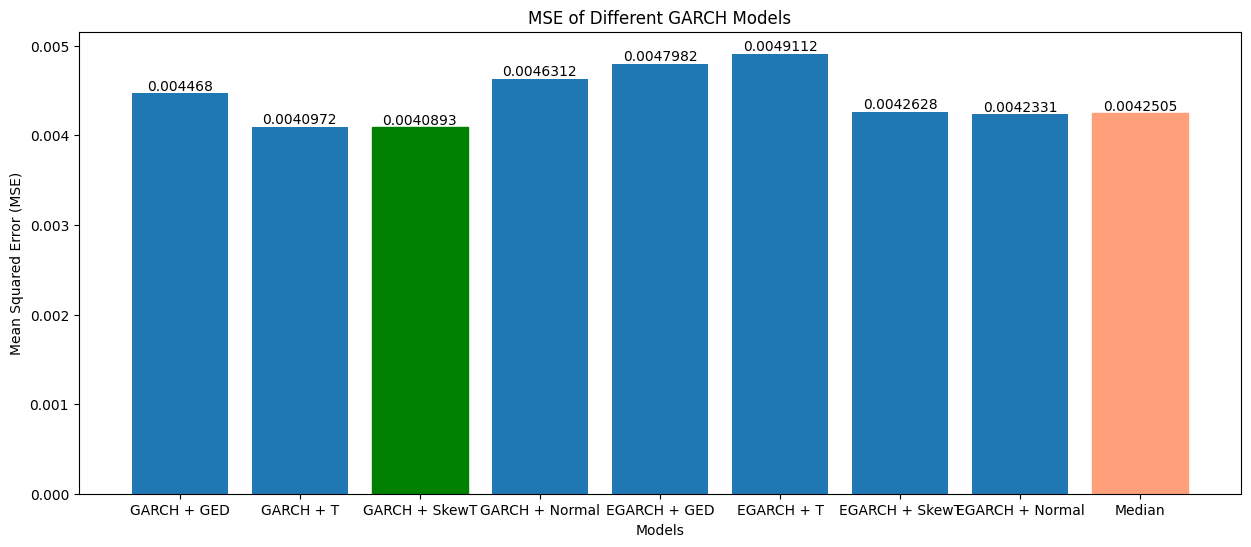

In [ ]:

mse_values = {
    'GARCH + GED': GARCH_ged_mse,
    'GARCH + T': GARCH_t_mse,
    'GARCH + SkewT': GARCH_skewt_mse,
    'GARCH + Normal': GARCH_norm_mse,
    'EGARCH + GED': EGARCH_ged_mse,
    'EGARCH + T': EGARCH_t_mse,
    'EGARCH + SkewT': EGARCH_skewt_mse,
    'EGARCH + Normal': EGARCH_norm_mse,
    'Median': median_preds_mse
}

models = list(mse_values.keys())
mse = list(mse_values.values())

plt.figure(figsize=(15, 6))
bars = plt.bar(models, mse)

all_height = []
for bar in bars:
    all_height.append(bar.get_height())

min_height = min(all_height)
min_height_index = all_height.index(min_height)
bars[min_height_index].set_color('green')

bars[-1].set_color('lightsalmon')

for bar, value in zip(bars, mse):
    bar_height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, bar_height, round(value, 7), ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE of Different GARCH Models')
plt.show()


# Ordinary Linear regression

In [ ]:
def get_X_df(all_preds:list,col_names:list):

  if len(all_preds)!=len(col_names):
    print("length of 'all_preds' and 'col_names' should be same")
    return

  X_dict={}
  for i in range(len(all_preds)):

    X_dict[col_names[i]]=all_preds[i]

  X_df=pd.DataFrame(X_dict)

  return X_df

## Making Train and Test split

### X_train

In [ ]:
model_names=['GARCH_ged','GARCH_t','GARCH_skewt','GARCH_norm','GARCH_all_dist','EGARCH_ged','EGARCH_t','EGARCH_skewt','EGARCH_norm','EGARCH_all_dist']

In [ ]:
X_train=get_X_df(all_preds=[GARCH_ged_train_preds_and_actuals['train preds'],
                            GARCH_t_train_preds_and_actuals['train preds'],
                            GARCH_skewt_train_preds_and_actuals['train preds'],
                            GARCH_norm_train_preds_and_actuals['train preds'],
                            GARCH_all_dist_train_preds_and_actuals['train preds'],
                            EGARCH_ged_train_preds_and_actuals['train preds'],
                            EGARCH_t_train_preds_and_actuals['train preds'],
                            EGARCH_skewt_train_preds_and_actuals['train preds'],
                            EGARCH_norm_train_preds_and_actuals['train preds'],
                            EGARCH_all_dist_train_preds_and_actuals['train preds']],
                 col_names=model_names)

In [ ]:
X_train.head()

,GARCH_ged,GARCH_t,GARCH_skewt,GARCH_norm,GARCH_all_dist,EGARCH_ged,EGARCH_t,EGARCH_skewt,EGARCH_norm,EGARCH_all_dist
0,0.234458,0.218860,0.227132,0.255753,0.198119,0.228723,0.239575,0.252571,0.220727,0.192353
1,0.229442,0.214554,0.222865,0.247529,0.195688,0.226306,0.237767,0.254452,0.217709,0.195008
2,0.225135,0.210590,0.218938,0.240595,0.193194,0.222949,0.240752,0.250696,0.214202,0.220198
3,0.240257,0.226995,0.234974,0.257678,0.229226,0.234046,0.242151,0.263235,0.225160,0.219207
4,0.215155,0.209248,0.214231,0.218506,0.211911,0.208038,0.216124,0.235410,0.205831,0.202725


In [ ]:
X_train.shape

(7161, 10)

### Y_train

In [ ]:
Y_train=GARCH_ged_train_preds_and_actuals['train trues']

In [ ]:
Y_train.shape

(7161,)

### X_test

In [ ]:
X_test=get_X_df(all_preds=[GARCH_ged_test_preds_and_actuals['test preds'],
                          GARCH_t_test_preds_and_actuals['test preds'],
                          GARCH_skewt_test_preds_and_actuals['test preds'],
                          GARCH_norm_test_preds_and_actuals['test preds'],
                          GARCH_all_dist_test_preds_and_actuals['test preds'],
                          EGARCH_ged_test_preds_and_actuals['test preds'],
                          EGARCH_t_test_preds_and_actuals['test preds'],
                          EGARCH_skewt_test_preds_and_actuals['test preds'],
                          EGARCH_norm_test_preds_and_actuals['test preds'],
                          EGARCH_all_dist_test_preds_and_actuals['test preds']],
                col_names=model_names)

In [ ]:
X_test.shape

(3900, 10)

### Y_test

In [ ]:
Y_test=GARCH_ged_test_preds_and_actuals['test trues']

In [ ]:
Y_test.shape

(3900,)

In [ ]:
def get_lr_preds(X_train,Y_train,X_test,Y_test,train_size:int, test_size:int):
  split_wise_preds=[]
  split_wise_actuals=[]

  for i,j in zip(range(0, X_train.shape[0], train_size),range(0,X_test.shape[0],test_size)):
    print(f'training from {i} to {i+train_size} in X_train')
    print(f'testing from {j} to {j+test_size} in X_test\n----')
    linear_regressor = linear_model.LinearRegression()
    linear_regressor.fit(X_train[i:(i+train_size)], Y_train[i:(i+train_size)])

    split_wise_preds.append(linear_regressor.predict(X_test[j:(j+test_size)]))
    split_wise_actuals.append(Y_test[j:(j+test_size)])

  return split_wise_preds,split_wise_actuals



In [ ]:
split_wise_lr_preds, split_wise_actuals = get_lr_preds(X_train,Y_train,X_test,Y_test,train_size=2387, test_size=1300)

training from 0 to 2387 in X_train
testing from 0 to 1300 in X_test
----
training from 2387 to 4774 in X_train
testing from 1300 to 2600 in X_test
----
training from 4774 to 7161 in X_train
testing from 2600 to 3900 in X_test
----


In [ ]:
split_wise_avg_preds=get_split_wise_preds(avg_preds,1300)

In [ ]:
split_wise_median_preds=get_split_wise_preds(median_preds,1300)

In [ ]:
split_wise_lr_preds[0].shape,split_wise_avg_preds[0].shape,split_wise_median_preds[0].shape,split_wise_actuals[0].shape

((1300,), (1300,), (1300,), (1300,))

In [ ]:
len(split_wise_lr_preds),len(split_wise_avg_preds),len(split_wise_median_preds),len(split_wise_actuals)

(3, 3, 3, 3)

In [ ]:
def get_MSE(split_wise_preds:list, split_wise_actuals:list):
  mse_values=[]
  for i in range(len(split_wise_preds)):
    mse_values.append(mean_squared_error(split_wise_actuals[i],split_wise_preds[i]))

  return mse_values

In [ ]:
split_wise_lr_preds_MSEs=get_MSE(split_wise_lr_preds,split_wise_actuals)

In [ ]:
split_wise_lr_preds_MSEs

[0.0030792626978510037, 0.0024196846568971067, 0.006673279444731137]

In [ ]:
split_wise_avg_preds_MSEs=get_MSE(split_wise_avg_preds,split_wise_actuals)

In [ ]:
split_wise_avg_preds_MSEs

[0.00437357604080086, 0.0020278608737724856, 0.0065561863018886325]

In [ ]:
split_wise_median_preds_MSEs=get_MSE(split_wise_median_preds,split_wise_actuals)

In [ ]:
split_wise_median_preds_MSEs

[0.0043376243596921086, 0.0019786310201931985, 0.006435310104032196]

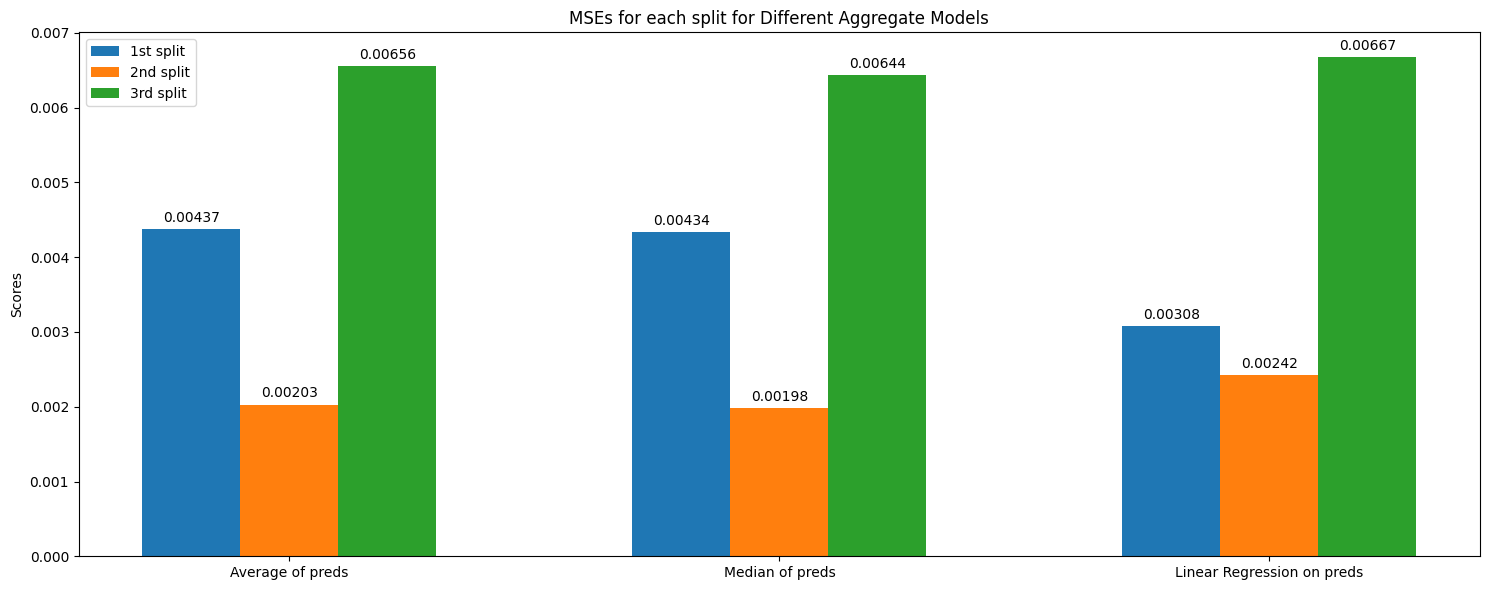

In [ ]:

import matplotlib.pyplot as plt
import numpy as np


models = ['Average of preds', 'Median of preds', 'Linear Regression on preds']
mse_scores_1 = [
    split_wise_avg_preds_MSEs[0],
    split_wise_median_preds_MSEs[0],
    split_wise_lr_preds_MSEs[0]
]
mse_scores_2 = [
    split_wise_avg_preds_MSEs[1],
    split_wise_median_preds_MSEs[1],
    split_wise_lr_preds_MSEs[1]
]
mse_scores_3 = [
    split_wise_avg_preds_MSEs[2],
    split_wise_median_preds_MSEs[2],
    split_wise_lr_preds_MSEs[2]
]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 6))
rects1 = ax.bar(x - width, mse_scores_1, width, label='1st split')
rects2 = ax.bar(x, mse_scores_2, width, label='2nd split')
rects3 = ax.bar(x + width, mse_scores_3, width, label='3rd split')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('MSEs for each split for Different Aggregate Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.5f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.savefig('MSEs for each split for Different Aggregate Models')
plt.show()
